<a href="https://colab.research.google.com/github/umergit24/ml-assignment-1/blob/main/KKN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment No.1:k-nearest neighbors


Before running this block, make sure to upload "data.mat" in the google drive.

In [122]:
#Enter your path of dataset from google drive
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/ML/"

dataset = path + "data.mat"

#Enter path of your test image
test_image=path+"me.png"
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']
images.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read.

In [116]:
import numpy as np
images= np.transpose(images)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")
print("Reshaped dim:", im.shape)

Reshaped dim: (32, 32, 3, 50)


(32, 32, 3)


(32, 32, 3)

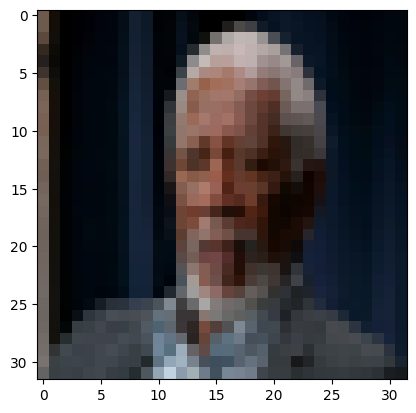

In [117]:
from matplotlib import pyplot as plt
#import cv2

plt.imshow(im[:,:,:,1])
print(im[:,:,:,0].shape)
a= im[:,:,:,1]
plt.imshow(a)
a.shape

You Need to write your code in this block.

images dim: (3072,)


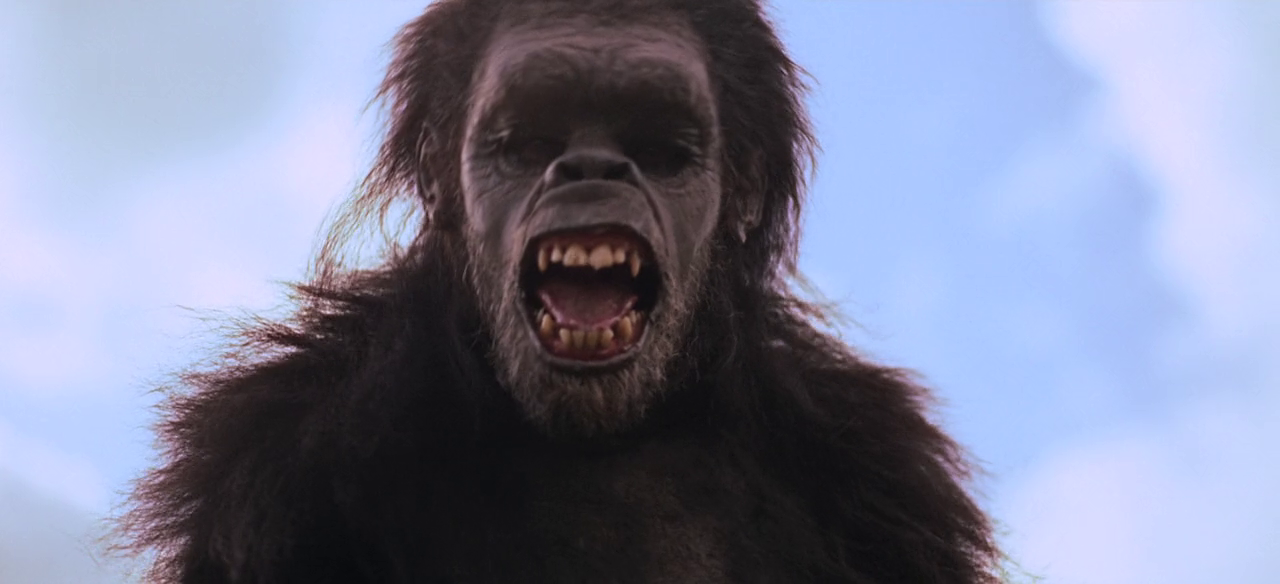

Original dim: (584, 1280, 3)


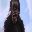

Resized dim: (32, 32, 3)
Reshaped dim: (3072,)
unsorted:  [7844.592213748271, 7748.978190703598, 7666.341174249943, 7523.864233224839, 7420.533740911094, 7279.224340546182, 6073.045940876786, 6053.859843108362, 5596.282248064334, 6616.156512658992, 7138.632151890164, 7096.549795499219, 7279.224340546182, 7236.792176095704, 7138.632151890164, 6758.337443484159, 6616.156512658992, 6906.1933798584005, 7330.705627700515, 8032.310937706533, 9151.308048579722, 9943.733453788873, 10144.43014663712, 9968.573468656385, 7138.632151890164, 6424.7159470283195, 7236.792176095704, 6156.153588077543, 6712.460875118752, 9235.404647334084, 10138.194069951513, 7373.361173847379, 9078.141825285613, 8990.866420985243, 8907.45008405885, 8714.436355840808, 8176.855202337877, 5678.741673997859, 7959.222261000129, 7959.222261000129, 7959.222261000129, 7577.577779211508, 5682.805381147589, 5615.189489233645, 5719.8055036862925, 6156.153588077543, 6117.189632502821, 5565.962001307591, 6095.744991385384, 6103.97

In [123]:
#from scipy import misc
import cv2
import numpy as np


from math import sqrt
from numpy import ndarray
from google.colab.patches import cv2_imshow



for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F")
print("images dim:", G.shape)

##############################


# read image
image = cv2.imread(test_image)

# display image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("Original dim:", image.shape)

##############################





    #Resize your image
####### Your code here #######


# resize image
resized_image=cv2.resize(image,(32,32))

# display resized image
cv2_imshow(resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("Resized dim:", resized_image.shape)

##############################



##############################

    #Reshape your image as we reshape the image of dataset
####### Your code here #######

# reshape image
reshaped_image= np.transpose(resized_image)
reshaped_image= np.reshape(reshaped_image,[-1], order="F")
print("Reshaped dim:", reshaped_image.shape)

#############################



    #Calculate Eucleadian distance between your image and dataset
####### Your code here #######

distances = []
for i in range(50):
  distance = np.linalg.norm(reshaped_image - G[i])
  distances.append(distance)

print("unsorted: ", distances)
# distances.sort()
# print("sorted: ", distances)

##############################

In this Block you need to fill the code for 1-NN.

In [124]:
# Write code for 1 NN
#Find min distance
#Fine at which point min value exists

####### Your code here #######
min_distance = min(distances)
min_index = distances.index(min_distance)
print("index:", min_index)
print("distance:", min_distance)

name = label[min_index][0]
print("celebrity look alike: ", name)


##############################

index: 47
distance: 5565.962001307591
celebrity look alike:  ['mahira khan']



Write code for 3 NN


In [125]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
#hint: Use for Loop

####### Your code here #######
distances_copy = distances.copy()

min_distances = []
min_indices = []
names = []
for i in range(3):
  min_distance = min(distances_copy)
  min_index = distances.index(min_distance)
  min_distances.append(min_distance)
  min_indices.append(min_index)
  distances_copy.remove(min_distance)
  names.append(label[min_index][0])

  print(f"{i+1} : Index: {min_indices[i]}, Distance: {min_distances[i]}")
  name = label[min_indices[i]][0]
  print("celebrity look alike: ", name)



##############################

1 : Index: 47, Distance: 5565.962001307591
celebrity look alike:  ['mahira khan']
2 : Index: 8, Distance: 5596.282248064334
celebrity look alike:  ['ahsan khan']
3 : Index: 43, Distance: 5615.189489233645
celebrity look alike:  ['fawad khan']


Write code for 5 NN

In [126]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances

####### Your code here #######
distances_copy = distances.copy()

min_distances = []
min_indices = []
for i in range(5):
  min_distance = min(distances_copy)
  min_index = distances.index(min_distance)
  min_distances.append(min_distance)
  min_indices.append(min_index)
  distances_copy.remove(min_distance)
  names.append(label[min_index][0])

  print(f"{i+1} : Index: {min_indices[i]}, Distance: {min_distances[i]}")
  name = label[min_indices[i]][0]
  print("celebrity look alike: ", name)





##############################

1 : Index: 47, Distance: 5565.962001307591
celebrity look alike:  ['mahira khan']
2 : Index: 8, Distance: 5596.282248064334
celebrity look alike:  ['ahsan khan']
3 : Index: 43, Distance: 5615.189489233645
celebrity look alike:  ['fawad khan']
4 : Index: 37, Distance: 5678.741673997859
celebrity look alike:  ['aishwarya rai']
5 : Index: 42, Distance: 5682.805381147589
celebrity look alike:  ['fawad khan']
